In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
# Simulated customer dataset
data = {
    'Age': [25, 34, 22, 27, 45, 52, 23, 43, 36, 29],
    'Annual_Income': [25000, 48000, 22000, 32000, 85000, 110000, 27000, 79000, 67000, 39000]
}

In [5]:
df = pd.DataFrame(data)
print(df.head())

   Age  Annual_Income
0   25          25000
1   34          48000
2   22          22000
3   27          32000
4   45          85000


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [7]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

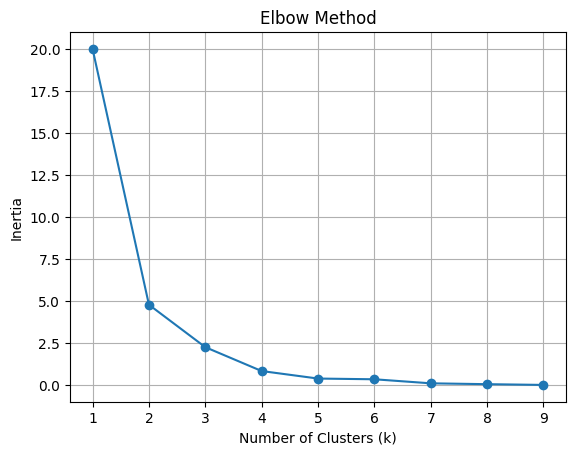

In [8]:
# Plot Elbow Curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [9]:
# Choose k from elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
print(df)

   Age  Annual_Income  Cluster
0   25          25000        0
1   34          48000        2
2   22          22000        0
3   27          32000        0
4   45          85000        1
5   52         110000        1
6   23          27000        0
7   43          79000        2
8   36          67000        2
9   29          39000        0


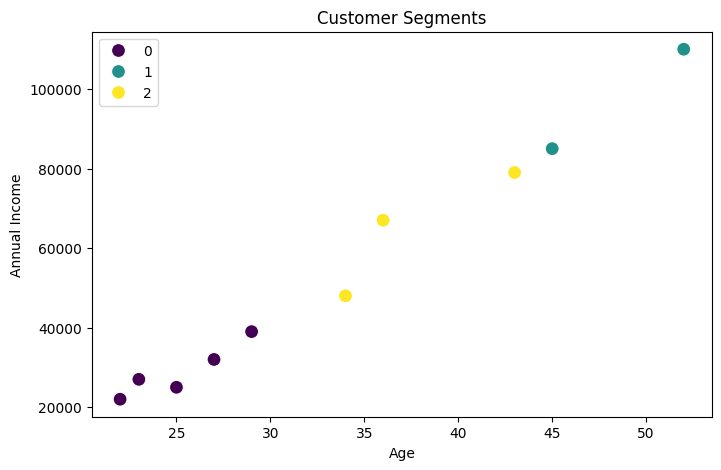

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Annual_Income', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()